## Theorem:

## Universal Approximation of Conditional Vector Fields

Let K be a compact subset of R^d × [0, 1], and let

    u: K → R^d

be a continuous vector field. Suppose F is the class of functions represented by a feedforward neural network
with ReLU activations and finite width and depth.

Then, for any ε > 0, there exists a function f_θ in F such that:

    sup_{(x, t) ∈ K} ||f_θ(x, t) - u(x, t)|| < ε

That is, f_θ uniformly converges to the target vector field u over the domain K.

### In the Context of Flow Matching

- u(x, t): the true vector field mapping noise samples to target distribution
- f_θ(x, t): the learned vector field from your neural network
- The theorem guarantees: with enough capacity, your model can approximate the true flow arbitrarily well


In [1]:
import torch
import torch.nn as nn

# Simple neural network to learn the vector field v(t, x)
class VectorFieldNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 64),  # input: (x1, x2, t)
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)   # output: vector direction in 2D
        )

    def forward(self, x, t):
        t = t.view(-1, 1)  # ensure t is (batch_size, 1)
        inp = torch.cat([x, t], dim=1)  # concatenate x and t
        return self.model(inp)


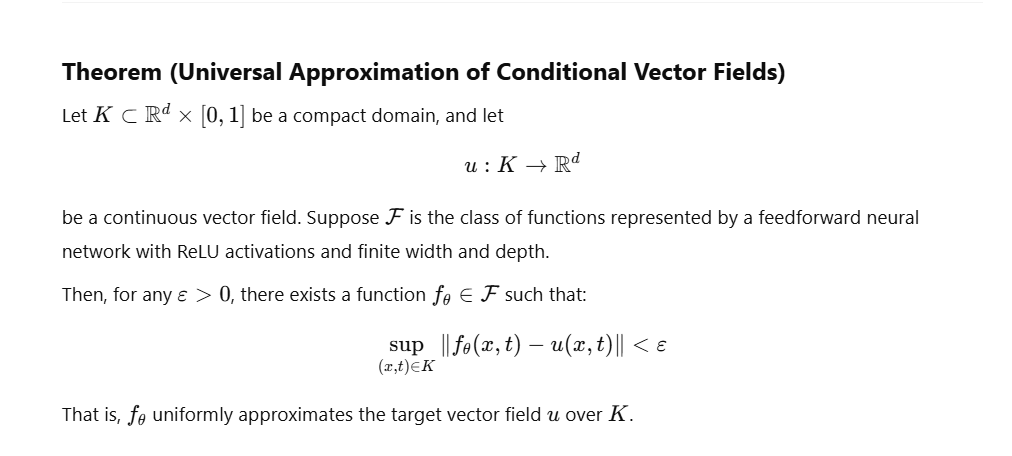

Why Is Two Enough (Usually)?

The Universal Approximation Theorem shows that even one hidden layer with ReLU and enough neurons can approximate any continuous function on a compact domain.

But in practice:

Deeper networks converge faster during training.

Shallower networks need exponentially more neurons to approximate complex functions.

Two non-linearities is a good trade-off: enough expressive power, but not too hard to train.
